# 更新及載入套件

In [ ]:
!pip install opencv-contrib-python -U

In [3]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from matplotlib import pyplot as plt

print(cv2.__version__)

4.1.2


# 霍夫轉換

(-0.5, 459.5, 459.5, -0.5)

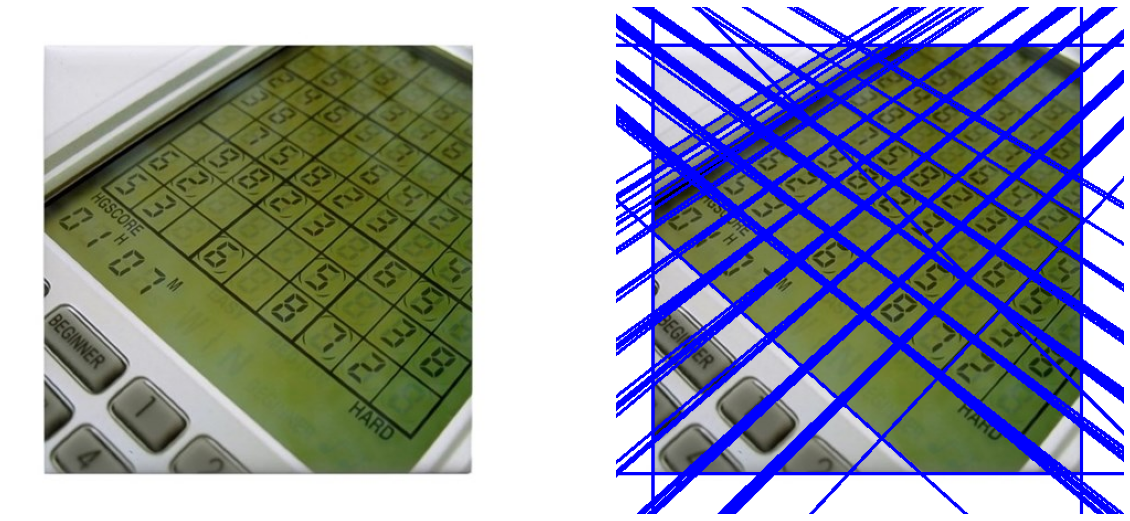

In [6]:
img = cv2.imread('computer.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
orgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
oShow=orgb.copy()
lines = cv2.HoughLines(edges,1,np.pi/180,140)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(orgb,(x1,y1),(x2,y2),(0,0,255),2)
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(121)
plt.imshow(oShow)
plt.axis('off')
plt.subplot(122)
plt.imshow(orgb)
plt.axis('off')


# 機率霍夫轉換

(-0.5, 459.5, 459.5, -0.5)

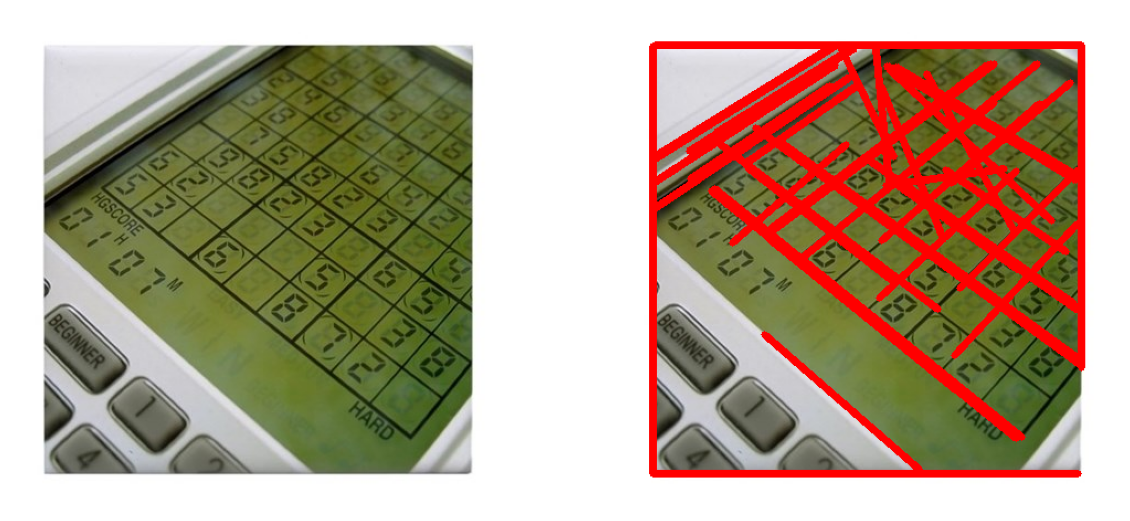

In [7]:
img = cv2.imread('computer.jpg',-1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize =3)
orgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
oShow=orgb.copy()
lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(orgb,(x1,y1),(x2,y2),(255,0,0),5)
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(121)
plt.imshow(oShow)
plt.axis('off')
plt.subplot(122)
plt.imshow(orgb)
plt.axis('off')


# 霍夫轉換圓形

(-0.5, 887.5, 653.5, -0.5)

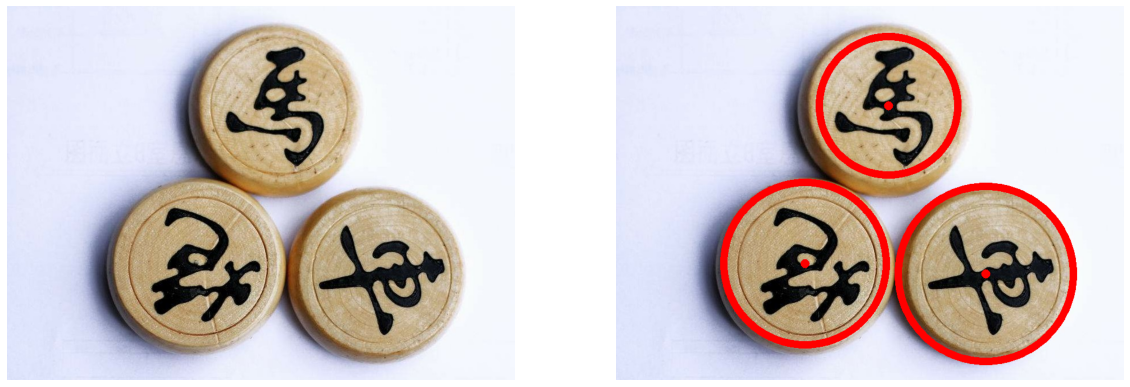

In [8]:
img = cv2.imread('chess.jpg',0)
imgo=cv2.imread('chess.jpg',-1)
o=cv2.cvtColor(imgo,cv2.COLOR_BGR2RGB)
oshow=o.copy()
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,300,
param1=50,param2=30,minRadius=100,maxRadius=200)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  cv2.circle(o,(i[0],i[1]),i[2],(255,0,0),12)
  cv2.circle(o,(i[0],i[1]),2,(255,0,0),12)
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(121)
plt.imshow(oshow)
plt.axis('off')
plt.subplot(122)
plt.imshow(o)
plt.axis('off')


# 調整參數

(-0.5, 887.5, 653.5, -0.5)

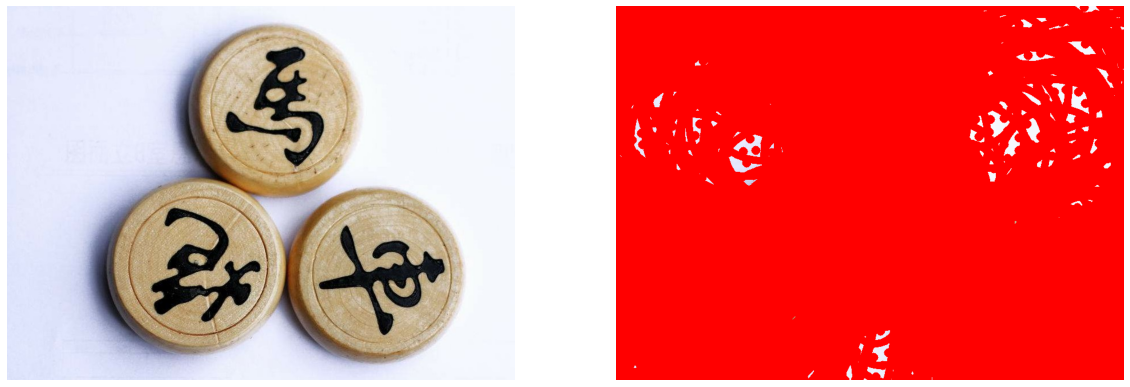

In [10]:
img = cv2.imread('chess.jpg',0)
imgo=cv2.imread('chess.jpg',-1)
o=cv2.cvtColor(imgo,cv2.COLOR_BGR2RGB)
oshow=o.copy()
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  cv2.circle(o,(i[0],i[1]),i[2],(255,0,0),12)
  cv2.circle(o,(i[0],i[1]),2,(255,0,0),12)
fig, ax = plt.subplots(figsize = (20, 10))
plt.subplot(121)
plt.imshow(oshow)
plt.axis('off')
plt.subplot(122)
plt.imshow(o)
plt.axis('off')
